In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import keyword
from IPython.display import set_matplotlib_formats
from pprint import pprint
import patternrekt as prekt
set_matplotlib_formats('retina')
plt.style.use('seaborn-notebook')

# Should We Eat the Mushroom
> **Every mushroom is edible except some can be eaten exactly once.**

In this class we will consider the problem of deciding whether the given mushroom is edible or poisonous.

<img src="mushroom.JPG" alt="Mushroom" width="200"/>

Luckily we don't have to sacrifice anyone tasting mushrooms since certain brave souls have done that for us.
Data from Kaggle: https://www.kaggle.com/uciml/mushroom-classification

The data descibes the features of the mushroom and whether it is poisonous.


## Basics Stuff

### Reading Data

In [5]:
#reading Data (civilized way)
df = pd.read_csv('mushrooms_train.csv')
#fix messy column names
#print(df.columns)
df.columns = df.columns \
    .str.strip() \
    .str.lower() \
    .str.replace(' ', '_') \
    .str.replace('(', '') \
    .str.replace(')', '') \
    .str.replace('-','_') \
    .map(lambda x: 'x'+x if x in keyword.kwlist else x )
#print(df.columns)
#or if you want to go manual (My favorite)
#data = np.genfromtxt('mushrooms.csv', skip_header=1, dtype=str, delimiter=',')

In [6]:
display(df)

,xclass,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l
6995,p,f,y,e,f,s,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
6996,p,k,y,e,f,s,f,c,n,b,...,k,w,p,p,w,o,e,w,v,d
6997,e,k,f,w,f,n,f,w,b,p,...,s,w,w,p,w,t,p,w,s,g


### Accessing Rows

In [7]:
# This is how you iterate by row
# Use this for now
# Eventually you will learn that there is usually a better way to do it.
# And that this is typically the last resort

for row in df.itertuples(name="Mushroom"):
    if row.Index > 1:
        break
    print(row) #entire row
    print('******* cap_shape', row.cap_shape)
    
# or you can access it by like this note it's bracket not parentheses
print(df.iloc[300].odor)
print(df.odor[300])


Mushroom(Index=0, xclass='p', cap_shape='x', cap_surface='s', cap_color='n', bruises='t', odor='p', gill_attachment='f', gill_spacing='c', gill_size='n', gill_color='k', stalk_shape='e', stalk_root='e', stalk_surface_above_ring='s', stalk_surface_below_ring='s', stalk_color_above_ring='w', stalk_color_below_ring='w', veil_type='p', veil_color='w', ring_number='o', ring_type='p', spore_print_color='k', population='s', habitat='u')
******* cap_shape x
Mushroom(Index=1, xclass='e', cap_shape='x', cap_surface='s', cap_color='y', bruises='t', odor='a', gill_attachment='f', gill_spacing='c', gill_size='b', gill_color='k', stalk_shape='e', stalk_root='c', stalk_surface_above_ring='s', stalk_surface_below_ring='s', stalk_color_above_ring='w', stalk_color_below_ring='w', veil_type='p', veil_color='w', ring_number='o', ring_type='p', spore_print_color='n', population='n', habitat='g')
******* cap_shape x
n
n


### Basic Statistics

In [8]:
#some simple statistics
pd.set_option('display.max_columns', 100)
df.describe() #how many row, uniqe, popular, frequency of popular

,xclass,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999,6999
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,p,t,b,s,s,w,w,p,w,o,p,n,v,d
freq,3743,3442,2892,1775,3651,3056,6982,5941,5116,1410,3986,3735,4528,4288,3884,3801,6999,6983,6682,3503,1924,3314,2890


In [9]:
df.cap_shape.value_counts()

x    3442
f    2988
b     323
k     212
s      32
c       2
Name: cap_shape, dtype: int64

In [10]:
df.cap_shape

0       x
1       x
2       b
3       x
4       x
       ..
6994    k
6995    f
6996    k
6997    k
6998    x
Name: cap_shape, Length: 6999, dtype: object

In [16]:
df.xclass == 'p'
df[df.xclass == 'p']

,xclass,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
13,p,x,y,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,v,u
17,p,x,s,n,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6991,p,k,y,e,f,m,f,c,b,y,e,c,k,y,c,c,p,w,n,n,w,c,d
6992,p,k,y,e,f,y,f,c,n,b,t,?,k,s,w,p,p,w,o,e,w,v,l
6993,p,f,s,e,f,y,f,c,n,b,t,?,k,k,p,p,p,w,o,e,w,v,d
6995,p,f,y,e,f,s,f,c,n,b,t,?,k,s,p,w,p,w,o,e,w,v,d


### Human Learning

#### 1) Let us calculate some basic stuff. What is the probabiliy of you dying if you pick a random mushroom and eat?
$$
P(\text{poisonous}) = ???
$$

In [21]:
x = sum(df.xclass == 'p') #no.row that is poisonous
y = len(df) #total
x/y #probability

0.4652093156165166

#### 2) Given that it is a red cap mushroom. What is the probability that it is poisonous?

$$
P(\text{poisonous} | \text{red cap}) = ???
$$

In [27]:
red_cap = df[df.cap_color == 'e'] # get red cap mushroom
x = sum(red_cap.xclass == 'p') # Total poisonous red_cap mush room
y = len(red_cap) #total mush room with red_cap
x/y # probability

0.4666666666666667

#### 3) Given that a mushroom is poisonous. What is the probability that it has a red cap?

$$
    P(\text{red cap} | \text{poisonous}) = ???
$$


In [29]:
poisonous = df[df.xclass=='p'] #get poisonous mushroom
x = sum(poisonous.cap_color == 'e') #sum of poisonous red_cap mushroom
y = len(poisonous) #Total poisonous mushroom
x/y #probability

0.1676904176904177

#### 4) Which cap color has the highest probability of killing you? Should we calculate
$$ P(\text{poisonous} | \text{red cap}) \textbf{ or } P(\text{red cap} | \text{poisonous}) $$

$$ P(\text{poisonous} | \text{red cap}) $$

#### 5) If your friend die of eating mushroom, what is the cap color that he most likely ate? Should we calculate
$$ P(\text{poisonous} | \text{red cap}) \textbf{ or } P(\text{red cap} | \text{poisonous}) $$

$$ P(\text{red cap} | \text{poisonous}) $$

#### 6) If we were to decide whether to eat a given mushroom or not which one should we calculate?

#### 7) What is the relation between
$$ P(\text{poisonous} | \text{red cap}) \textbf{ and } P(\text{red cap} | \text{poisonous}) $$

#### 8) Visualization: Let us learn how to draw some fancy graph? Plot the graph below for all the columns.

The width of each bar represents how many mushroom are of given cap_color.

The stack shows the percentage of poisonous/edible given cap_color.

[('n', {'total': 1775, 'p': 708, 'e': 1067}),
 ('g', {'total': 1708, 'p': 808, 'e': 900}),
 ('e', {'total': 1170, 'p': 546, 'e': 624}),
 ('y', {'total': 1065, 'p': 665, 'e': 400}),
 ('w', {'total': 917, 'p': 320, 'e': 597}),
 ('b', {'total': 168, 'p': 120, 'e': 48}),
 ('p', {'total': 137, 'p': 88, 'e': 49}),
 ('c', {'total': 27, 'p': 1, 'e': 26}),
 ('u', {'total': 16, 'p': 0, 'e': 16}),
 ('r', {'total': 16, 'p': 0, 'e': 16})]

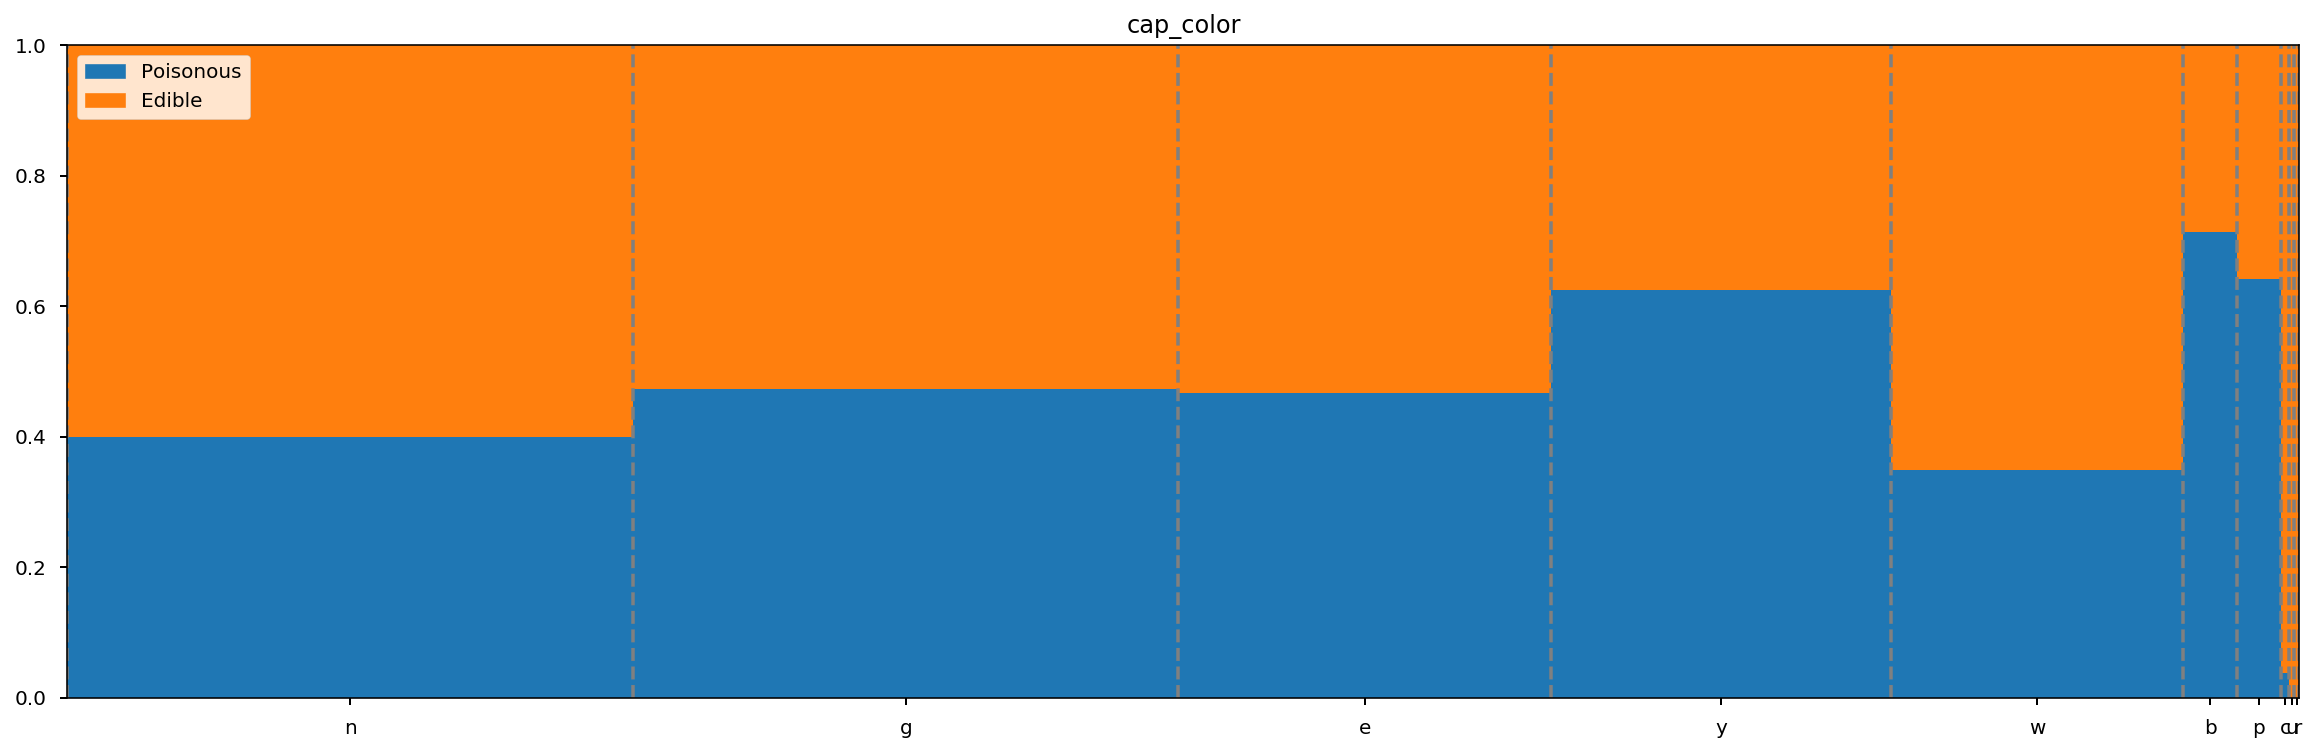

In [16]:
#see pattenrekt.py for the magic optimize it and make a pull request if you like
prekt.mushroom_plot(df.cap_color, df.xclass, legend_map={'p': 'Poisonous', 'e': 'Edible'})

#### 9) With data exploration from 8) If we want to use exactly one mushroom feature to decide edibility of a mushroom, which one do we use? Code it up.

In [49]:
#len(n) = total mush room of color n
#orange = edible
#blue = poisonous
#df.column = print out all the column
for col in df.columns:
    prekt.mushroom_plot(col, df.xclass, legend_map={'p': 'Poisonous', 'e': 'Edible'})

AttributeError: 'str' object has no attribute 'name'

In [74]:
all_odors = df.odor.unique()
prob_dict = {o:sum((df.odor == o) & (df.xclass == 'e'))/len(df) for o in all_odors}
def simple_is_edible(mushroom):
    odor = mushroom.odor
    return prob_dict.get(odor,0.)

In [75]:
true_positive = 0
for i,mushroom in enumerate(df.itertuples()): #find true positive
    #print(mushroom.odor, simple_is_edible(mushroom))
    prob = simple_is_edible(mushroom)
    should_eat = prob > 0.5
    if should_eat and mushroom.xclass == 'e':
        true_positive += 1    
print(true_positive, sum(df.xclass == 'e'), true_positive/sum(df.xclass == 'e'))

0 3743 0.0


#### 10) How should we draw the probability line whether to eat the mushroom or not? We will cover this later.

#### 11) What if we want to use more feature? What is 
$$
P(\text{edible} | \text{red cap} \cap \text{smooth surface} \cap \text{black spore})
$$

How would you implement the equivalent of simple_is_edible? Don't implement it though.

#### 12) What's wrong with look up table? This is called cursed of dimensionality.

#### Epilogue

Note that we have just made a classifier that can classify a poisonous mushroom from edible one to a certain degree.

We 1) learned something about mushroom plotting graph/printing values **then** 2) transfer the knowledge to computer. This is called *human learning*.

What we wish to do is to have computer automate the process of learning itself. That to have computer look up the data then figure out how to calculate the probability. 

(This kind of machine learning is called supervised machine learning for the fact that you supervise the computer on what's right)

### Naive Bayes Classifier

To make things more concrete let us look at the simplest generative model. Naive Bayes Classifier.

#### 1) What is the definition of Conditional Probability
$$P(A|B) = ???$$

Also revert that and find out what is
$$
P(A \cap B) = ???
$$

$$P(A|B) = P(A|B) * P(B) = P(A \cap B)$$
$$P(A \cap B) = $$

#### 2) Let

- $R$ = Red Cap
- $S$ = Smooth Surface
- $B$ = Black spore 
- $E$ = Edible

Fill in the blank

$$
P(E | R \cap S \cap B ) = \frac{P(...)}{P(....)}
$$

#### 3) What's wrong with using lookup table to calculate the term on the top. (ignore the term at the bottom for now)

#### 4) Simplify the term on the top
$$
P(R \cap S \cap B \cap E) = P(R| ...) \times P(...)
$$

#### 5) Simplify it further do it all the way
$$
P(R \cap S \cap B \cap E) = P(...|...) \times P(...|...) \times P(...|...)\times P(...)
$$

#### 6) Why is calculating it directly is a bad idea?

#### 7) What is Conditional Independence Assumption? Using this assumption what is now the
$$ P(R \cap S \cap B \cap E) = ...$$

#### 8) What is Prior?

#### 9) The denominator is called the evidence term. Why is calculating this a bad idea?

#### 10) What do we know about

$$P(E| R \cap S \cap B) + P(\sim E| R \cap S \cap B)$$

#### 11) Show that
$$
P(R \cap S \cap B) = P(...|...)P(...|...)P(...|...)P(...|...)P(E) + P(...|...)P(...|...)P(...|...)P(...|...)P(\sim E)
$$

#### 12) Implement the following
This will make your life a bit easier

In [77]:
# class NaiveBayes:
#     def __init__(self, df, class_col):
#         #do something
#         #you *may* want to cache every possible query for cond_prof. Up to you.
#         self.df = df
#         self.class_col = class_col
#         feature_cols = [col for col in df.columns if col != class_col]
#         self.feature_dict = {}
#         for class_val in df[class_col].unique():
#             for col in feature_columns:
#                 d = self._build_dict_for_column(col,class_val)
#             self.feature_dict[class_val] = d
#         pass

#     # ex: cond_prof('cap_color','r','e') => P(cap_color==red|edible)
#     def cond_prob(self, feature_col, feature_value, class_value):
#         ret = {}
#         right_class = self.df[self.class_col] == class_val
#         sum_right_class = sum(right_class)
#         for col_val in self.df[col_name].unique():
#             right_val = self.df[col_name] == col_val
#             ret[col_val] = sum(right_class & right_val)/sum_right_class
#         return ret
  
#     #mushroom is stuff you got from itertuple
#     def prob_edible(self, mushroom):
#         return P(edible | all mushroom features)
     
class NaiveBayes:
    def __init__(self, df, class_col):
        self.df = df
        self.class_col = class_col
        # feature_dict class_col -> col_name -> feature -> probability(col_name == feature | col)
       
        self.feature_columns = [col for col in df.columns if col != class_col]
        self.feature_dict = {}
        for class_val in df[class_col].unique():
            d = {}
            for col in self.feature_columns:
                d[col] = self._build_dict_for_column(col, class_val)
            self.feature_dict[class_val] = d
       
    def _build_dict_for_column(self, col_name, class_val) -> 'Dict[str -> prob]':
        ret = {}
        right_class = self.df[self.class_col]==class_val
        sum_right_class = sum(right_class)
        for col_value in self.df[col_name].unique():
            right_value = self.df[col_name] == col_value
            ret[col_value] = sum(right_class & right_value)/sum_right_class
        return ret
 
    #mushroom is stuff you got from itertuple
    def prob_edible(self, mushroom):
       
        #build the product P(x|E).P(y|E)...
        p_x_e = 1.
        p_x_p = 1.
        for col_name in self.feature_columns:
            col_value = getattr(mushroom, col_name)
            p_x_e *= self.feature_dict['e'][col_name].get(col_value, 0)
            p_x_p *= self.feature_dict['p'][col_name].get(col_value, 0)
        #print(p_x_e, p_x_p)
        #prior
        p_e = sum(self.df[self.class_col]=='e')
        p_p = sum(self.df[self.class_col]=='p')
       
        evidence = p_x_e * p_e + p_x_p * p_p
        return p_x_e * p_e / evidence

In [78]:
nb = NaiveBayes(df,'xclass')
for i,mushroom in enumerate(df.itertuples()):
    print (i,mushroom.odor,nb.prob_edible(mushroom))

0 p 0.0
1 a 1.0
2 l 1.0
3 p 0.0
4 n 1.0
5 a 1.0
6 a 1.0
7 l 1.0
8 p 0.0
9 a 1.0
10 l 1.0
11 a 1.0
12 a 1.0
13 p 0.0
14 n 1.0
15 n 1.0
16 n 1.0
17 p 0.0
18 p 0.0
19 p 0.0
20 a 1.0
21 p 0.0
22 l 1.0
23 a 1.0
24 l 1.0
25 p 0.0
26 a 1.0
27 l 1.0
28 n 0.9992909525960066
29 a 1.0
30 l 1.0
31 p 0.0
32 l 1.0
33 l 1.0
34 l 1.0
35 l 1.0
36 n 1.0
37 p 0.0
38 a 1.0
39 l 1.0
40 a 1.0
41 l 1.0
42 n 0.9891250084889185
43 p 0.0
44 a 1.0
45 a 1.0
46 l 1.0
47 l 1.0
48 l 1.0
49 l 1.0
50 a 1.0
51 l 1.0
52 l 1.0
53 p 0.0
54 p 0.0
55 a 1.0
56 n 1.0
57 a 1.0
58 l 1.0
59 a 1.0
60 n 1.0
61 a 1.0
62 l 1.0
63 l 1.0
64 l 1.0
65 n 1.0
66 l 1.0
67 a 1.0
68 a 1.0
69 n 0.9872392769236444
70 l 1.0
71 l 1.0
72 l 1.0
73 a 1.0
74 a 1.0
75 l 1.0
76 l 1.0
77 l 1.0
78 p 0.0
79 a 1.0
80 n 0.9999971147716834
81 p 0.0
82 n 0.9993630248229599
83 n 0.9999988919836814
84 l 1.0
85 n 0.9999969073959318
86 a 1.0
87 l 1.0
88 l 1.0
89 n 1.0
90 n 0.9995529063356855
91 l 1.0
92 a 1.0
93 l 1.0
94 n 1.0
95 a 1.0
96 l 1.0
97 a 1.0
98 a 1.0

758 a 1.0
759 a 1.0
760 l 1.0
761 l 1.0
762 l 1.0
763 n 0.9662798897147753
764 l 1.0
765 n 1.0
766 l 1.0
767 n 0.9888994460349589
768 a 1.0
769 a 1.0
770 a 1.0
771 l 1.0
772 a 1.0
773 a 1.0
774 n 1.0
775 a 1.0
776 p 0.0
777 a 1.0
778 l 1.0
779 l 1.0
780 a 1.0
781 n 1.0
782 l 1.0
783 l 1.0
784 a 1.0
785 p 0.0
786 n 0.9984915571684225
787 l 1.0
788 p 0.0
789 l 1.0
790 l 1.0
791 l 1.0
792 a 1.0
793 a 1.0
794 p 0.0
795 p 0.0
796 l 1.0
797 n 0.9999665537324329
798 p 0.0
799 l 1.0
800 a 1.0
801 a 1.0
802 p 0.0
803 l 1.0
804 a 1.0
805 l 1.0
806 a 1.0
807 a 1.0
808 l 1.0
809 l 1.0
810 a 1.0
811 a 1.0
812 p 0.0
813 p 0.0
814 p 0.0
815 a 1.0
816 a 1.0
817 a 1.0
818 a 1.0
819 l 1.0
820 l 1.0
821 n 0.9970243447201332
822 a 1.0
823 l 1.0
824 a 1.0
825 l 1.0
826 l 1.0
827 a 1.0
828 l 1.0
829 l 1.0
830 n 1.0
831 a 1.0
832 l 1.0
833 l 1.0
834 l 1.0
835 p 0.0
836 l 1.0
837 p 0.0
838 a 1.0
839 a 1.0
840 a 1.0
841 p 0.0
842 a 1.0
843 n 1.0
844 a 1.0
845 n 0.9999987166821774
846 a 1.0
847 l 1.0
848 l 1.0


1336 n 1.0
1337 n 0.9999975338674805
1338 a 1.0
1339 n 0.9999989900704757
1340 n 1.0
1341 n 1.0
1342 p 0.0
1343 n 1.0
1344 n 0.9999982531560618
1345 n 1.0
1346 p 0.0
1347 n 0.9999914799971411
1348 n 1.0
1349 n 0.999985075766214
1350 n 1.0
1351 n 0.9999975896359448
1352 n 0.9999729129968771
1353 n 1.0
1354 n 1.0
1355 n 1.0
1356 n 0.9999993551164379
1357 n 1.0
1358 n 1.0
1359 n 0.9999982658234328
1360 n 1.0
1361 p 0.0
1362 n 1.0
1363 n 0.999990961282708
1364 n 1.0
1365 n 0.9999965305409552
1366 n 1.0
1367 n 1.0
1368 n 1.0
1369 n 1.0
1370 n 0.9999955695661866
1371 n 0.9999861838390764
1372 n 0.999989004607386
1373 l 1.0
1374 p 0.0
1375 p 0.0
1376 n 0.9999991675859149
1377 n 0.9999987009177551
1378 p 0.0
1379 n 0.9999953963882399
1380 p 0.0
1381 n 1.0
1382 p 0.0
1383 n 1.0
1384 n 1.0
1385 n 1.0
1386 n 0.9999987406543385
1387 n 0.9999789998485102
1388 n 1.0
1389 n 0.999999051506502
1390 n 1.0
1391 n 0.9999663094304693
1392 n 1.0
1393 n 0.9999892590420967
1394 n 0.9999986057765589
1395 n 0.9

1862 n 1.0
1863 n 0.9999936414442844
1864 n 0.9999972219479742
1865 n 1.0
1866 n 0.9999890648820281
1867 n 1.0
1868 n 1.0
1869 n 0.9999982890420029
1870 n 0.9999983199263752
1871 n 1.0
1872 n 1.0
1873 n 1.0
1874 n 1.0
1875 n 0.9999812038020894
1876 n 0.9999950553680595
1877 n 1.0
1878 n 0.9999560758275534
1879 n 1.0
1880 n 1.0
1881 n 1.0
1882 n 1.0
1883 n 1.0
1884 n 1.0
1885 l 1.0
1886 n 1.0
1887 p 0.0
1888 n 1.0
1889 n 1.0
1890 n 1.0
1891 n 1.0
1892 n 1.0
1893 n 1.0
1894 n 1.0
1895 n 1.0
1896 n 0.9999944041256589
1897 n 0.9999967387635639
1898 n 1.0
1899 n 0.9999825601961788
1900 n 0.99999678799896
1901 n 1.0
1902 n 1.0
1903 n 0.9999647748074396
1904 n 0.9999983821497552
1905 n 1.0
1906 n 1.0
1907 n 0.9999844788179052
1908 n 1.0
1909 n 0.9999986664861366
1910 n 1.0
1911 n 1.0
1912 n 1.0
1913 n 0.9999767831724111
1914 n 1.0
1915 l 1.0
1916 p 0.0
1917 n 1.0
1918 n 0.9999989695367089
1919 n 1.0
1920 n 1.0
1921 n 1.0
1922 n 0.9999991870094966
1923 n 0.9999828186600092
1924 n 1.0
1925 n 1.

2389 n 0.9998951481566221
2390 n 0.9999974817888121
2391 n 1.0
2392 n 0.9999847379342351
2393 n 0.9998832424697051
2394 n 0.9999807039459273
2395 n 1.0
2396 n 1.0
2397 n 1.0
2398 n 1.0
2399 n 0.9999990066158274
2400 p 0.0
2401 n 0.9999964853389911
2402 n 1.0
2403 n 0.9999599436118827
2404 n 0.9996271296406921
2405 n 0.9999907362818198
2406 n 1.0
2407 n 0.9999979288696764
2408 n 1.0
2409 n 1.0
2410 n 0.9999782314687196
2411 n 0.9999504214045098
2412 n 0.9997463052856278
2413 n 0.9999457087728699
2414 n 0.9999752109635431
2415 n 0.9999200573408906
2416 n 1.0
2417 n 1.0
2418 n 1.0
2419 n 1.0
2420 n 1.0
2421 n 1.0
2422 n 1.0
2423 n 0.9999906018216075
2424 n 0.9999991829385537
2425 n 1.0
2426 c 0.0
2427 n 0.9999926208490606
2428 n 1.0
2429 n 0.9999853678212959
2430 n 1.0
2431 n 1.0
2432 n 1.0
2433 n 0.9999970435020279
2434 n 1.0
2435 n 1.0
2436 n 1.0
2437 n 1.0
2438 n 1.0
2439 n 1.0
2440 n 0.9999984897965909
2441 n 0.9999643368166474
2442 n 0.9999969502147551
2443 f 0.0
2444 n 0.99998862149

2882 n 0.9999711576293724
2883 n 0.9999982652159087
2884 n 0.9999737519879364
2885 n 0.9999969236231281
2886 n 1.0
2887 c 0.0
2888 n 0.9998801524257258
2889 n 1.0
2890 n 1.0
2891 n 1.0
2892 c 0.0
2893 n 1.0
2894 n 0.9997929812509498
2895 n 1.0
2896 n 0.9997383024501906
2897 n 1.0
2898 n 0.9999990119331635
2899 n 1.0
2900 n 1.0
2901 n 1.0
2902 n 0.9999903200150828
2903 f 0.0
2904 n 0.9999982200565303
2905 n 0.9999870706863919
2906 n 1.0
2907 n 0.9999414796549244
2908 n 0.9999933513161923
2909 n 0.9999805463628008
2910 n 1.0
2911 n 1.0
2912 n 1.0
2913 n 0.9999551045777942
2914 n 1.0
2915 n 1.0
2916 n 0.9999947639194615
2917 n 0.9999532610158279
2918 n 0.9999978635186165
2919 n 1.0
2920 n 1.0
2921 n 1.0
2922 n 0.9999973439011121
2923 n 1.0
2924 n 0.999994506002872
2925 n 0.999996171861049
2926 f 0.0
2927 n 1.0
2928 n 1.0
2929 n 0.9999844030355781
2930 n 1.0
2931 n 0.9999992066138825
2932 n 1.0
2933 n 0.9999365192087575
2934 n 1.0
2935 n 0.9999863829930316
2936 n 1.0
2937 f 0.0
2938 n 0.99

3439 f 0.0
3440 n 0.9999837860180133
3441 c 0.0
3442 n 0.9999355027282573
3443 c 0.0
3444 c 0.0
3445 n 0.9999816347168761
3446 c 0.0
3447 f 0.0
3448 n 1.0
3449 n 0.9998860877742882
3450 n 0.9999984009103506
3451 f 0.0
3452 c 0.0
3453 f 0.0
3454 c 0.0
3455 n 1.0
3456 n 0.9999873857972216
3457 c 0.0
3458 n 1.0
3459 n 0.9999696235669344
3460 n 1.0
3461 n 1.0
3462 n 1.0
3463 c 0.0
3464 n 1.0
3465 f 0.0
3466 n 0.9999329209919402
3467 n 1.0
3468 c 0.0
3469 c 0.0
3470 n 1.0
3471 n 0.9998034343024704
3472 n 1.0
3473 f 0.0
3474 n 0.9999962301316773
3475 n 0.999994213782028
3476 n 1.0
3477 c 0.0
3478 n 0.9999106905954039
3479 f 0.0
3480 n 0.9999514859227375
3481 n 1.0
3482 n 0.9999968421958385
3483 c 0.0
3484 c 0.0
3485 n 0.9999779560666896
3486 n 0.99997765529793
3487 n 1.0
3488 f 0.0
3489 n 1.0
3490 f 0.0
3491 n 1.0
3492 f 0.0
3493 n 0.9999844178293487
3494 n 0.9999991123272449
3495 n 0.9999902435548063
3496 f 0.0
3497 n 1.0
3498 n 1.0
3499 n 1.0
3500 c 0.0
3501 n 0.999979401399279
3502 n 0.99

3991 f 0.0
3992 f 0.0
3993 c 0.0
3994 c 0.0
3995 f 0.0
3996 f 0.0
3997 f 0.0
3998 n 1.0
3999 f 0.0
4000 n 0.9997982325233232
4001 f 0.0
4002 n 1.0
4003 n 1.0
4004 f 0.0
4005 f 0.0
4006 n 1.0
4007 f 0.0
4008 n 0.9999791496764886
4009 n 1.0
4010 n 1.0
4011 f 0.0
4012 n 1.0
4013 f 0.0
4014 f 0.0
4015 f 0.0
4016 f 0.0
4017 f 0.0
4018 n 1.0
4019 n 1.0
4020 f 0.0
4021 f 0.0
4022 f 0.0
4023 y 0.0
4024 f 0.0
4025 f 0.0
4026 c 0.0
4027 f 0.0
4028 f 0.0
4029 f 0.0
4030 f 0.0
4031 c 0.0
4032 f 0.0
4033 n 0.9999777638653475
4034 f 0.0
4035 f 0.0
4036 f 0.0
4037 f 0.0
4038 f 0.0
4039 n 1.0
4040 f 0.0
4041 n 0.9999964518379648
4042 f 0.0
4043 f 0.0
4044 f 0.0
4045 c 0.0
4046 f 0.0
4047 n 1.0
4048 c 0.0
4049 f 0.0
4050 f 0.0
4051 c 0.0
4052 f 0.0
4053 f 0.0
4054 n 1.0
4055 f 0.0
4056 f 0.0
4057 c 0.0
4058 c 0.0
4059 n 0.9999904833467957
4060 f 0.0
4061 n 0.999999230882145
4062 n 0.9999877058318475
4063 f 0.0
4064 f 0.0
4065 f 0.0
4066 f 0.0
4067 f 0.0
4068 n 0.9999635888365477
4069 f 0.0
4070 f 0.0
4

4763 f 0.0
4764 f 0.0
4765 f 0.0
4766 f 0.0
4767 f 0.0
4768 f 0.0
4769 f 0.0
4770 f 0.0
4771 f 0.0
4772 f 0.0
4773 f 0.0
4774 f 0.0
4775 f 0.0
4776 f 0.0
4777 n 1.0
4778 f 0.0
4779 c 0.0
4780 f 0.0
4781 f 0.0
4782 f 0.0
4783 n 0.9999402523098614
4784 f 0.0
4785 f 0.0
4786 f 0.0
4787 f 0.0
4788 n 0.9999864262546978
4789 f 0.0
4790 f 0.0
4791 f 0.0
4792 f 0.0
4793 f 0.0
4794 f 0.0
4795 f 0.0
4796 f 0.0
4797 f 0.0
4798 f 0.0
4799 n 0.999999117078735
4800 f 0.0
4801 f 0.0
4802 f 0.0
4803 f 0.0
4804 f 0.0
4805 f 0.0
4806 n 1.0
4807 f 0.0
4808 f 0.0
4809 f 0.0
4810 f 0.0
4811 f 0.0
4812 n 1.0
4813 f 0.0
4814 n 0.0004249232836854635
4815 f 0.0
4816 f 0.0
4817 s 0.0
4818 f 0.0
4819 f 0.0
4820 f 0.0
4821 f 0.0
4822 f 0.0
4823 f 0.0
4824 n 1.0
4825 f 0.0
4826 n 0.001157681859119193
4827 f 0.0
4828 f 0.0
4829 f 0.0
4830 f 0.0
4831 n 1.0
4832 f 0.0
4833 f 0.0
4834 n 0.10172610994267062
4835 c 0.0
4836 f 0.0
4837 f 0.0
4838 f 0.0
4839 f 0.0
4840 n 0.0
4841 f 0.0
4842 n 0.9999944854168972
4843 n 0.0

5525 n 1.0
5526 n 0.0
5527 f 0.0
5528 n 1.0
5529 f 0.0
5530 y 0.0
5531 f 0.0
5532 f 0.0
5533 f 0.0
5534 n 1.0
5535 f 0.0
5536 n 1.0
5537 n 1.0
5538 n 1.0
5539 f 0.0
5540 n 1.0
5541 f 0.0
5542 f 0.0
5543 f 0.0
5544 n 1.0
5545 f 0.0
5546 n 0.6528067348069979
5547 n 0.0982754500949252
5548 n 0.0
5549 y 0.0
5550 f 0.0
5551 n 1.0
5552 f 0.0
5553 n 1.0
5554 y 0.0
5555 f 0.0
5556 n 1.0
5557 n 1.0
5558 s 0.0
5559 f 0.0
5560 f 0.0
5561 f 0.0
5562 n 1.0
5563 n 1.0
5564 f 0.0
5565 f 0.0
5566 n 0.0
5567 f 0.0
5568 f 0.0
5569 n 1.0
5570 n 1.0
5571 n 0.0
5572 f 0.0
5573 y 0.0
5574 f 0.0
5575 f 0.0
5576 s 0.0
5577 n 0.0
5578 n 0.7073722474925813
5579 f 0.0
5580 f 0.0
5581 f 0.0
5582 n 0.12145130392904922
5583 y 0.0
5584 f 0.0
5585 y 0.0
5586 n 1.0
5587 n 0.0
5588 n 1.0
5589 y 0.0
5590 f 0.0
5591 f 0.0
5592 f 0.0
5593 n 0.0
5594 s 0.0
5595 s 0.0
5596 n 1.0
5597 f 0.0
5598 n 0.7529309240850058
5599 n 1.0
5600 y 0.0
5601 n 0.117419006378276
5602 f 0.0
5603 s 0.0
5604 n 1.0
5605 n 0.0
5606 f 0.0
5607 f 0

6297 f 0.0
6298 y 0.0
6299 y 0.0
6300 s 0.0
6301 y 0.0
6302 f 0.0
6303 s 0.0
6304 s 0.0
6305 f 0.0
6306 f 0.0
6307 f 0.0
6308 y 0.0
6309 f 0.0
6310 f 0.0
6311 f 0.0
6312 f 0.0
6313 s 0.0
6314 f 0.0
6315 y 0.0
6316 f 0.0
6317 y 0.0
6318 f 0.0
6319 y 0.0
6320 f 0.0
6321 y 0.0
6322 f 0.0
6323 s 0.0
6324 s 0.0
6325 y 0.0
6326 s 0.0
6327 y 0.0
6328 f 0.0
6329 f 0.0
6330 f 0.0
6331 n 0.9553798943243171
6332 f 0.0
6333 f 0.0
6334 s 0.0
6335 s 0.0
6336 f 0.0
6337 y 0.0
6338 s 0.0
6339 f 0.0
6340 f 0.0
6341 f 0.0
6342 f 0.0
6343 y 0.0
6344 f 0.0
6345 f 0.0
6346 f 0.0
6347 s 0.0
6348 f 0.0
6349 f 0.0
6350 f 0.0
6351 f 0.0
6352 s 0.0
6353 y 0.0
6354 y 0.0
6355 y 0.0
6356 f 0.0
6357 y 0.0
6358 y 0.0
6359 f 0.0
6360 f 0.0
6361 y 0.0
6362 f 0.0
6363 s 0.0
6364 y 0.0
6365 f 0.0
6366 n 1.0
6367 f 0.0
6368 f 0.0
6369 y 0.0
6370 f 0.0
6371 y 0.0
6372 f 0.0
6373 f 0.0
6374 y 0.0
6375 n 1.0
6376 f 0.0
6377 s 0.0
6378 y 0.0
6379 s 0.0
6380 s 0.0
6381 f 0.0
6382 s 0.0
6383 s 0.0
6384 y 0.0
6385 f 0.0
6386 s

#### 13) There is a test file at mushrooms_test.csv

If we make a cut at probability of 0.5(that is >=0.5 edible, <0.5 don't eat). How many do we get correctly?



#### 14) Why don't we test on the train data? We will cover this later.

In [ ]:
true_negative = 0
for i, mushroom in enumerate(df_test.itertuples()):
    pred_edible = nb.prob_edible(mushroom) <= 0.5
    if pred_edible and mushroom.xclass == 'p':
        true_negative += 1
all_negative = sum(df_test.xclass == 'e')
print(true_negative, true_negative/all_negative)

#### 15) Is 0.5 cutoff a good idea? We will also talk about his later.